In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('train_adv_housing.csv')
df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1163,1164,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959
1164,1164,1165,80,RL,NaN,16157,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,194000
1165,1165,1166,20,RL,79.0,9541,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,233170
1166,1166,1167,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,245350


In [3]:
list = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for element in list:
    df = pd.get_dummies(df, columns=[element], prefix=element)

df

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,False,False,False,True,False,False,False,False,True,False
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,False,False,False,True,False,False,False,False,True,False
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,False,False,False,True,False,False,False,False,True,False
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,False,False,False,True,True,False,False,False,False,False
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1163,1164,90,60.0,12900,4,4,1969,1969,0.0,...,False,False,False,True,False,False,True,False,False,False
1164,1164,1165,80,NaN,16157,5,7,1978,1978,0.0,...,False,False,False,True,False,False,False,False,True,False
1165,1165,1166,20,79.0,9541,7,5,2009,2009,268.0,...,False,True,False,False,False,False,False,False,False,True
1166,1166,1167,20,64.0,10475,8,5,2008,2008,72.0,...,False,False,False,True,False,False,False,False,True,False


In [4]:
X = df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave',
 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl',
 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_1Fam',
 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_CompShg',
 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_Stone','Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','Exterior2nd_Wd Shng','MasVnrType_BrkCmn','MasVnrType_BrkFace','MasVnrType_Stone','ExterQual_Ex','ExterQual_Fa','ExterQual_Gd','ExterQual_TA','ExterCond_Ex','ExterCond_Fa','ExterCond_Gd','ExterCond_Po','ExterCond_TA','Foundation_BrkTil','Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood','BsmtQual_Ex','BsmtQual_Fa','BsmtQual_Gd','BsmtQual_TA','BsmtCond_Fa','BsmtCond_Gd','BsmtCond_Po','BsmtCond_TA','BsmtExposure_Av','BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_No','BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec','BsmtFinType1_Unf','BsmtFinType2_ALQ','BsmtFinType2_BLQ','BsmtFinType2_GLQ','BsmtFinType2_LwQ','BsmtFinType2_Rec','BsmtFinType2_Unf','Heating_GasA','Heating_GasW','Heating_Grav','Heating_Wall','HeatingQC_Ex','HeatingQC_Fa','HeatingQC_Gd','HeatingQC_Po','HeatingQC_TA','CentralAir_N','CentralAir_Y','Electrical_FuseA','Electrical_FuseF','Electrical_FuseP','Electrical_Mix','Electrical_SBrkr','KitchenQual_Ex','KitchenQual_Fa','KitchenQual_Gd','KitchenQual_TA','Functional_Maj1','Functional_Maj2','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Sev','Functional_Typ','FireplaceQu_Ex','FireplaceQu_Fa','FireplaceQu_Gd','FireplaceQu_Po','FireplaceQu_TA','GarageType_2Types','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort','GarageType_Detchd','GarageFinish_Fin','GarageFinish_RFn','GarageFinish_Unf','GarageQual_Ex','GarageQual_Fa','GarageQual_Gd','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_Fa','GarageCond_Gd','GarageCond_Po','GarageCond_TA','PavedDrive_N','PavedDrive_P','PavedDrive_Y','PoolQC_Ex','PoolQC_Fa','Fence_GdPrv','Fence_GdWo','Fence_MnPrv','Fence_MnWw','MiscFeature_Gar2','MiscFeature_Othr','MiscFeature_Shed','SaleType_COD','SaleType_CWD','SaleType_Con','SaleType_ConLD','SaleType_ConLI','SaleType_ConLw','SaleType_New','SaleType_Oth','SaleType_WD','SaleCondition_Abnorml','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Normal','SaleCondition_Partial']]

y = df['SalePrice']

X = X.fillna(0)

In [5]:
model = GradientBoostingRegressor()
model.fit(X, y)

GradientBoostingRegressor()

In [7]:
df_goal = pd.read_csv('test_adv_housing.csv')
df_goal

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1168,1169,70,RL,120.0,13728,Pave,NaN,Reg,Lvl,...,90,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1,1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
2,1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,...,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal
3,1171,1172,20,RL,76.0,9120,Pave,NaN,Reg,Lvl,...,288,0,NaN,NaN,Shed,1400,11,2008,WD,Normal
4,1172,1173,160,FV,35.0,4017,Pave,Pave,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
288,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
289,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
290,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [8]:
list = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for element in list:
    df_goal = pd.get_dummies(df_goal, columns=[element], prefix=element)

df_goal

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_CWD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1168,1169,70,120.0,13728,6,7,1935,1986,0.0,...,False,False,False,False,True,False,False,False,True,False
1,1169,1170,60,118.0,35760,10,5,1995,1996,1378.0,...,False,False,False,False,True,False,False,False,True,False
2,1170,1171,80,76.0,9880,6,6,1977,1977,0.0,...,False,False,False,False,True,False,False,False,True,False
3,1171,1172,20,76.0,9120,6,6,1958,1958,0.0,...,False,False,False,False,True,False,False,False,True,False
4,1172,1173,160,35.0,4017,7,5,2006,2007,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1455,1456,60,62.0,7917,6,5,1999,2000,0.0,...,False,False,False,False,True,False,False,False,True,False
288,1456,1457,20,85.0,13175,6,6,1978,1988,119.0,...,False,False,False,False,True,False,False,False,True,False
289,1457,1458,70,66.0,9042,7,9,1941,2006,0.0,...,False,False,False,False,True,False,False,False,True,False
290,1458,1459,20,68.0,9717,5,6,1950,1996,0.0,...,False,False,False,False,True,False,False,False,True,False


In [36]:
final_table_columns = X.columns
 
for col in final_table_columns:
    if col not in df_goal.columns:
        df_goal[col] = 0

A = df_goal[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave',
 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl',
 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_1Fam',
 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_CompShg',
 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_Stone','Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','Exterior2nd_Wd Shng','MasVnrType_BrkCmn','MasVnrType_BrkFace','MasVnrType_Stone','ExterQual_Ex','ExterQual_Fa','ExterQual_Gd','ExterQual_TA','ExterCond_Ex','ExterCond_Fa','ExterCond_Gd','ExterCond_Po','ExterCond_TA','Foundation_BrkTil','Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood','BsmtQual_Ex','BsmtQual_Fa','BsmtQual_Gd','BsmtQual_TA','BsmtCond_Fa','BsmtCond_Gd','BsmtCond_Po','BsmtCond_TA','BsmtExposure_Av','BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_No','BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec','BsmtFinType1_Unf','BsmtFinType2_ALQ','BsmtFinType2_BLQ','BsmtFinType2_GLQ','BsmtFinType2_LwQ','BsmtFinType2_Rec','BsmtFinType2_Unf','Heating_GasA','Heating_GasW','Heating_Grav','Heating_Wall','HeatingQC_Ex','HeatingQC_Fa','HeatingQC_Gd','HeatingQC_Po','HeatingQC_TA','CentralAir_N','CentralAir_Y','Electrical_FuseA','Electrical_FuseF','Electrical_FuseP','Electrical_Mix','Electrical_SBrkr','KitchenQual_Ex','KitchenQual_Fa','KitchenQual_Gd','KitchenQual_TA','Functional_Maj1','Functional_Maj2','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Sev','Functional_Typ','FireplaceQu_Ex','FireplaceQu_Fa','FireplaceQu_Gd','FireplaceQu_Po','FireplaceQu_TA','GarageType_2Types','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort','GarageType_Detchd','GarageFinish_Fin','GarageFinish_RFn','GarageFinish_Unf','GarageQual_Ex','GarageQual_Fa','GarageQual_Gd','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_Fa','GarageCond_Gd','GarageCond_Po','GarageCond_TA','PavedDrive_N','PavedDrive_P','PavedDrive_Y','PoolQC_Ex','PoolQC_Fa','Fence_GdPrv','Fence_GdWo','Fence_MnPrv','Fence_MnWw','MiscFeature_Gar2','MiscFeature_Othr','MiscFeature_Shed','SaleType_COD','SaleType_CWD','SaleType_Con','SaleType_ConLD','SaleType_ConLI','SaleType_ConLw','SaleType_New','SaleType_Oth','SaleType_WD','SaleCondition_Abnorml','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Normal','SaleCondition_Partial']]
 
A = A.fillna(0)

prices = pd.DataFrame(model.predict(A))
prices.to_csv('prices.csv')

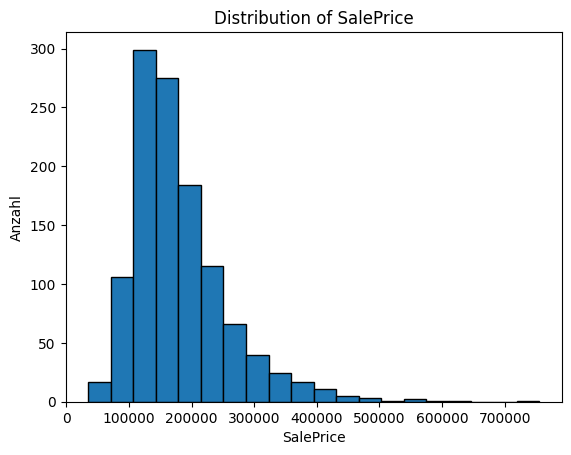

In [41]:
df['SalePrice'].plot.hist(bins=20,edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Anzahl')
plt.show()

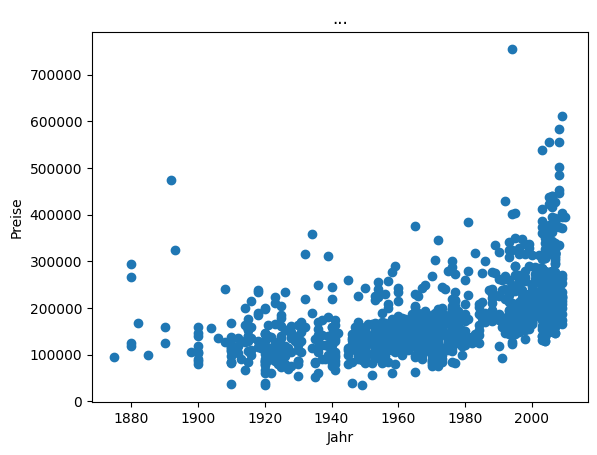

In [48]:
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel("Jahr")
plt.ylabel("Preise")
plt.title("...")
plt.show()

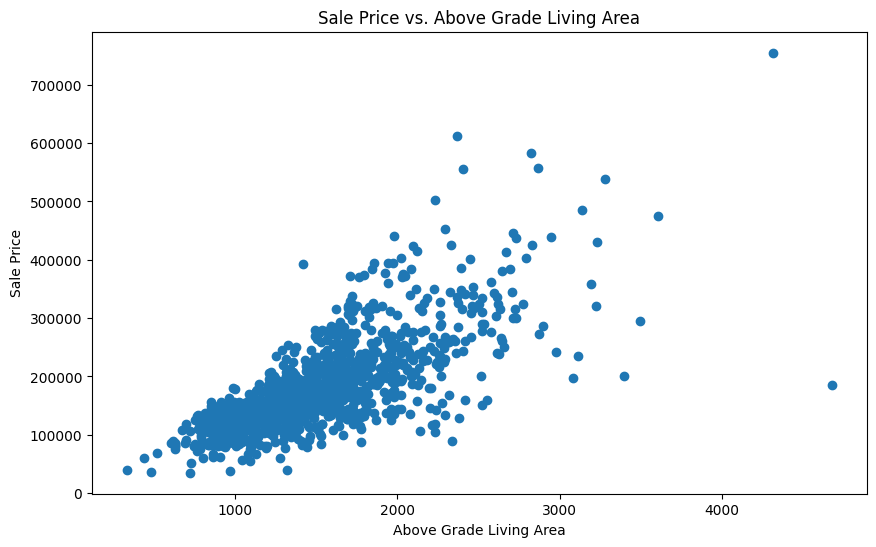

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('Sale Price vs. Above Grade Living Area')
plt.xlabel('Above Grade Living Area')
plt.ylabel('Sale Price')
plt.show()

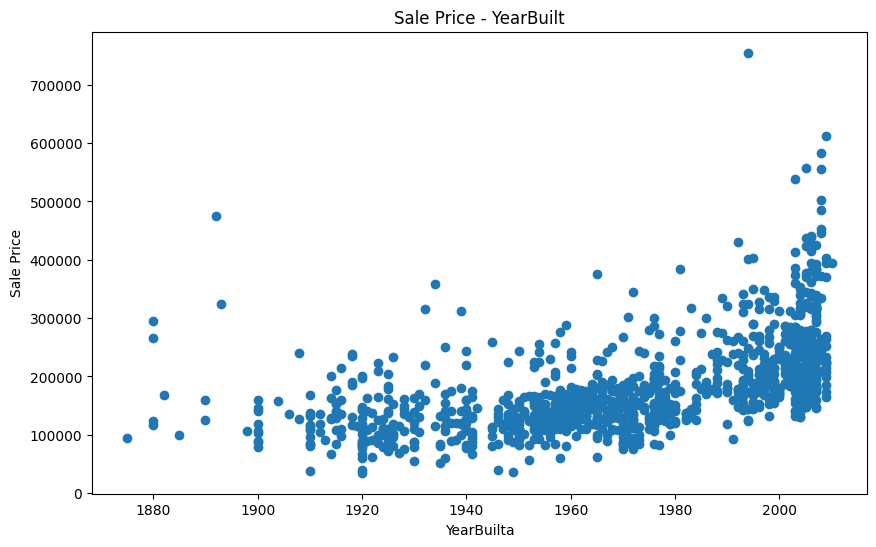

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.title('Sale Price - YearBuilt')
plt.xlabel('YearBuilta')
plt.ylabel('Sale Price')
plt.show()

Text(0.5, 1.02, 'Paarweise Streudiagramme')

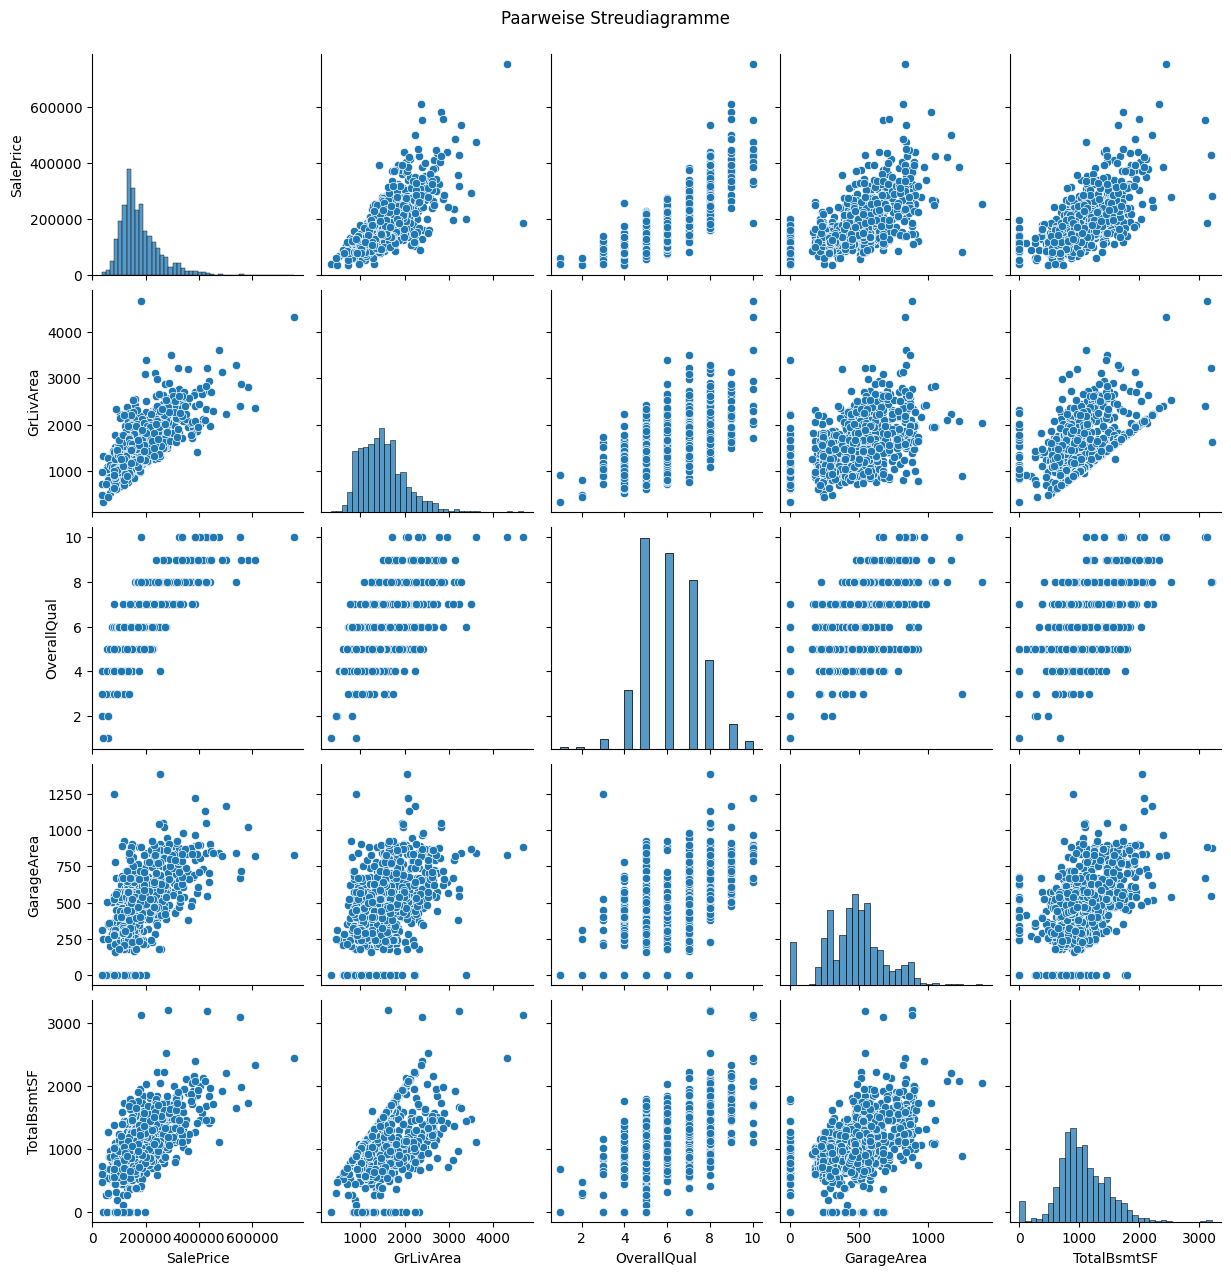

In [37]:
sns.pairplot(df, vars=['SalePrice', 'GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF'])
plt.suptitle("Paarweise Streudiagramme", y=1.02)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

m1_model = LinearRegression()
m2_model = GradientBoostingRegressor()
m3_model = DecisionTreeRegressor()
m4_model = RandomForestRegressor()
m5_model = SVR()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m1_model.fit(X_train, y_train)
m2_model.fit(X_train, y_train)
m3_model.fit(X_train, y_train)
m4_model.fit(X_train, y_train)
m5_model.fit(X_train, y_train)

m1_y_pred = m1_model.predict(X_test)
m2_y_pred = m2_model.predict(X_test)
m3_y_pred = m3_model.predict(X_test)
m4_y_pred = m4_model.predict(X_test)
m5_y_pred = m5_model.predict(X_test)


# Modellbewertung
m1_mae = mean_absolute_error(y_test, m1_y_pred)
m1_mse = mean_squared_error(y_test, m1_y_pred)

m2_mae = mean_absolute_error(y_test, m2_y_pred)
m2_mse = mean_squared_error(y_test, m2_y_pred)

m3_mae = mean_absolute_error(y_test, m3_y_pred)
m3_mse = mean_squared_error(y_test, m3_y_pred)

m4_mae = mean_absolute_error(y_test, m4_y_pred)
m4_mse = mean_squared_error(y_test, m4_y_pred)

m5_mae = mean_absolute_error(y_test, m5_y_pred)
m5_mse = mean_squared_error(y_test, m5_y_pred)

# Ausgabe der Metriken
print(f'1_Mean Absolute Error: {m1_mae}')
print(f'1_Mean Squared Error: {m1_mse}')

print(f'2_Mean Absolute Error: {m2_mae}')
print(f'2_Mean Squared Error: {m2_mse}')

print(f'3_Mean Absolute Error: {m3_mae}')
print(f'3_Mean Squared Error: {m3_mse}')

print(f'4_Mean Absolute Error: {m4_mae}')
print(f'4_Mean Squared Error: {m4_mse}')

print(f'5_Mean Absolute Error: {m5_mae}')
print(f'5_Mean Squared Error: {m5_mse}')

1_Mean Absolute Error: 19237.30562752371
1_Mean Squared Error: 891761979.9359603
2_Mean Absolute Error: 16792.74084080486
2_Mean Squared Error: 706215408.5889531
3_Mean Absolute Error: 28184.9358974359
3_Mean Squared Error: 1614280191.8760684
4_Mean Absolute Error: 17935.85461538462
4_Mean Squared Error: 829307614.7502806
5_Mean Absolute Error: 55298.355256626106
5_Mean Squared Error: 6526771111.310764
